# ***TASK 2***

# **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import calendar

df= pd.read_csv('Unemployment_Rate_upto_11_2020.csv')
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [ ]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [ ]:
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [ ]:
import datetime as dt

df.columns = ['States', 'Date', 'Frequency', 'Estimated Unemployment Rate', 'Estimated Employed',
              'Estimated Labour Participation Rate', 'Region', 'longitude', 'latitude']

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

df['Frequency'] = df['Frequency'].astype('category')
df['Region'] = df['Region'].astype('category')

df['Month'] = df['Date'].dt.month

df['Month_int'] = df['Month'].apply(lambda x: int(x))

df['Month_name'] = df['Month_int'].apply(lambda x: calendar.month_abbr[x])

df.drop(columns='Month', inplace=True)

In [ ]:
df.head()

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,longitude,latitude,Month_int,Month_name
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,1,Jan
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,2,Feb
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,3,Mar
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74,4,Apr
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74,5,May


# **Data Visualization**

<Axes: >

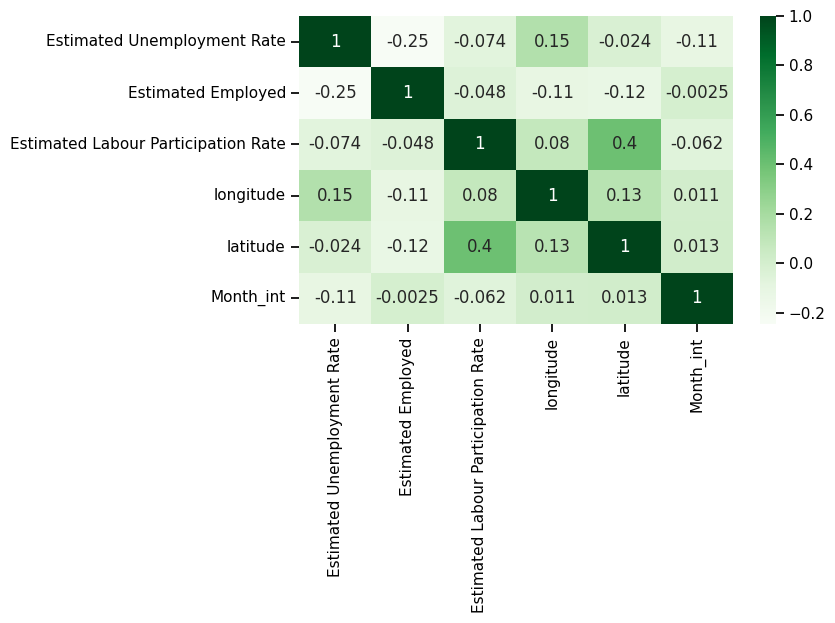

In [ ]:
#Heat Map
hm = df[['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate', 'longitude', 'latitude', 'Month_int']]
hm = hm.corr()
plt.figure(figsize=(7,4))
sns.heatmap(data=hm, annot=True, cmap= 'Greens')

In [ ]:
#Box  Plot
fig = px.box(df, x='States', y='Estimated Unemployment Rate', color='States', title='Unemployment rate per States', template='seaborn')

# Updating the x-axis category order to be in descending total
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()

In [ ]:
#Bar Plot
unem_plot = df[['Estimated Unemployment Rate','States']]
df_unemployed = unem_plot.groupby('States').mean().reset_index()

df_unemployed = df_unemployed.sort_values('Estimated Unemployment Rate', ascending=False)
fig = px.bar(df_unemployed, x='States',y='Estimated Unemployment Rate',color = 'States',title = 'Average unemployment rate in each state',
             template= 'seaborn')
fig.show()

In [ ]:
#Sunburst chart
unemployed_df = df[['States', 'Region', 'Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate']]

unemployed = unemployed_df.groupby(['Region', 'States'])['Estimated Unemployment Rate'].mean().reset_index()

fig = px.sunburst(unemployed, path=['Region', 'States'], values='Estimated Unemployment Rate', color_continuous_scale='rdylbu',
                  title='Unemployment rate in each Region and State', height=600, template='presentation')

fig.show()